# *Car Price*

## Car price prediction (Linear regression)

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains data about 4800 cars. Initially, it has 8 columns: "make_model", "body_type", "Body Color", "km", "hp", "Gearing Type", "Extras", "price".

**Metadata:**
    
* **ID** - car ID (we should add it up)

* **make_model** - car model

* **body_type** - body type

* **Body Color** - car color

* **km** - car kmage

* **hp** - horse power

* **Gearing Type** - gearing type

* **Extras** - additional equipment

* **price** - price

### Questions:
    

* #### Predict the sales price of a car based on its features



## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info
* ### insert ID column
* ### Observation of target variable (describe + visualisation:distplot)
* ### Numerical and Categorical features
    * #### List of Numerical and Categorical features
* ### Missing Data
    * #### List of data features with missing values  
* ### Numerical and Categorical features    
    * #### Visualisation  of Numerical and categorical features (regplot + barplot)

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### One-Hot Encoding 
    * #### str.get_dummies
* ### Creating datasets for ML part
    * #### 'Train\Test' split
* ### 'train\test (validation)' split

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### ML Models (Linear regression, Gradient Boosting Regression)
* ### Build, train, evaluate and visualise models
* ### Creating final predictions with Test set
* ### Model comparison


## [Conclusion](#Conclusion.)
* ### Submission of ‘.csv’ file with predictions

## Part 1: Import, Load Data.

In [2309]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats 

# import models and metrics
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

In [2310]:
df = pd.read_csv('car_price.csv')

# identify target
# target = df['price']

## Part 2: Exploratory Data Analysis.

* ### DF Info

In [2311]:
df.head()

,make_model,body_type,Body Color,km,hp,Gearing Type,Extras,price
0,Audi A1,Sedans,Black,56013,85,Automatic,"Alloy wheels,Catalytic Converter,Voice Control",15770
1,Audi A1,Sedans,Red,80000,85,Automatic,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500
2,Audi A1,Sedans,Black,83450,85,Automatic,"Alloy wheels,Voice Control",14640
3,Audi A1,Sedans,Brown,73000,85,Automatic,"Alloy wheels,Sport seats,Voice Control",14500
4,Audi A1,Sedans,Black,16200,85,Automatic,"Alloy wheels,Sport package,Sport suspension,Vo...",16790


In [2312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4800 non-null   object
 1   body_type     4800 non-null   object
 2   Body Color    4800 non-null   object
 3   km            4800 non-null   int64 
 4   hp            4800 non-null   int64 
 5   Gearing Type  4800 non-null   object
 6   Extras        4800 non-null   object
 7   price         4800 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 300.1+ KB


* ### insert ID column

In [2313]:
# inserting ID column
df.insert(0, "ID", range(0, len(df)))

In [2314]:
df.head(10)

,ID,make_model,body_type,Body Color,km,hp,Gearing Type,Extras,price
0,0,Audi A1,Sedans,Black,56013,85,Automatic,"Alloy wheels,Catalytic Converter,Voice Control",15770
1,1,Audi A1,Sedans,Red,80000,85,Automatic,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500
2,2,Audi A1,Sedans,Black,83450,85,Automatic,"Alloy wheels,Voice Control",14640
3,3,Audi A1,Sedans,Brown,73000,85,Automatic,"Alloy wheels,Sport seats,Voice Control",14500
4,4,Audi A1,Sedans,Black,16200,85,Automatic,"Alloy wheels,Sport package,Sport suspension,Vo...",16790
5,5,Audi A1,Sedans,White,63668,85,Automatic,"Alloy wheels,Sport package,Sport seats,Sport s...",15090
6,6,Audi A1,Station wagon,White,62111,85,Automatic,"Alloy wheels,Sport package,Sport seats,Sport s...",16422
7,7,Audi A1,Compact,Red,14986,85,Automatic,Alloy wheels,14480
8,8,Audi A1,Sedans,Grey,57000,85,Automatic,Alloy wheels,16700
9,9,Audi A1,Sedans,White,16103,85,Automatic,Alloy wheels,17990


In [2315]:
# set 'ID' to index
df = df.set_index('ID')

* ### Observation of target variable

In [2316]:
# target variable
df['price'].describe()

count     4800.000000
mean     19722.871875
std       4337.519969
min       5555.000000
25%      15990.000000
50%      19588.000000
75%      22692.500000
max      56100.000000
Name: price, dtype: float64

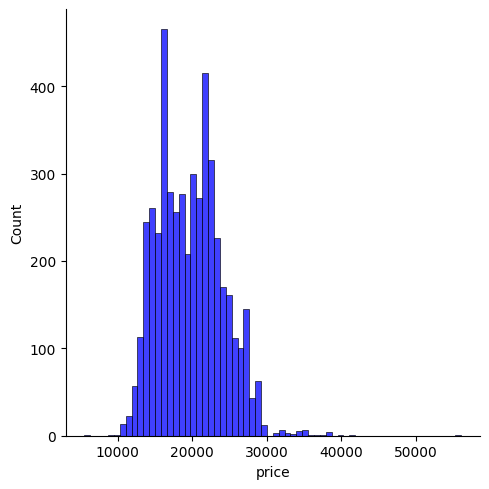

In [2317]:
# visualisation of 'price' distribution
sns.displot(df['price'], color='b')

* ### Numerical and Categorical features
#### List of Numerical and Categorical features

In [2318]:
# check for Numerical and Categorical features in DF
numerical_feats_df = df.dtypes[df.dtypes != 'object'].index
print ('Quantity of Numerical features: ', len(numerical_feats_df))
print ()
print (df[numerical_feats_df].columns)
print ()
categorical_feats_df = df.dtypes[df.dtypes == 'object'].index
print ('Quantity of Categorical features: ', len(categorical_feats_df))
print ()
print (df[categorical_feats_df].columns)

Quantity of Numerical features:  3

Index(['km', 'hp', 'price'], dtype='object')

Quantity of Categorical features:  5

Index(['make_model', 'body_type', 'Body Color', 'Gearing Type', 'Extras'], dtype='object')


* ### Missing values

#### List of data features with missing values

In [2319]:
# check the DF features with missing values 
# we know from above that there are no missing values in the dataframe, so we'll comment this block
#nan_columns = [i for i in df.columns if df[i].isnull().any()]
#print(df.isnull().sum())
#print()
#print("There are " + str(len(nan_columns)) + " columns with NAN values for" + str(len(df)) + " rows.")
#nan_columns

#### Visualisation  of Numerical features (regplot)

C:\Users\Olga Pavlova\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


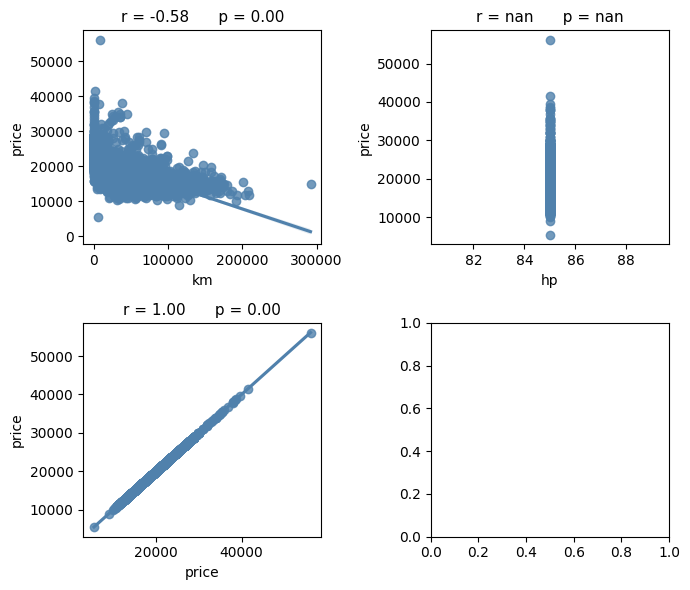

In [2320]:
# numerical features visualisation
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

num_feats = list(numerical_feats_df)
not_plot = ['ID',  'Price']
plot_num_feats = [c for c in list(numerical_feats_df) if c not in not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols + c
        if i < len(plot_num_feats):
            sns.regplot(x = df[plot_num_feats[i]], y = df['price'], ax = axs[r][c], color = "#5081ac" )
            stp = stats.pearsonr(df[plot_num_feats[i]], df['price'])
          
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)



plt.tight_layout()    
plt.show()

<Axes: xlabel='make_model', ylabel='price'>

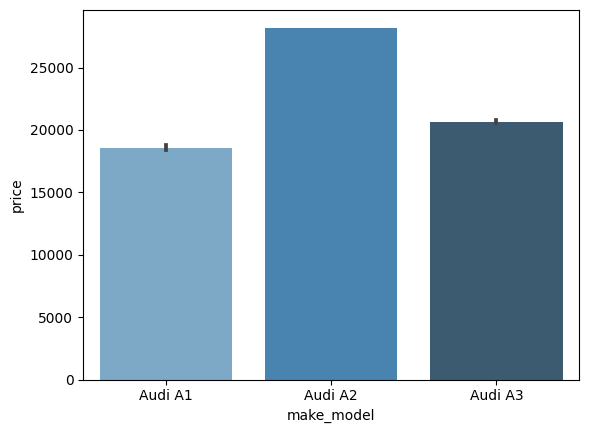

In [2321]:
# categorical features visualisation
# 'price' split in 'make_model' level
sns.barplot(x = 'make_model', y = 'price', data = df, palette = "Blues_d")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sedans'),
  Text(1, 0, 'Station wagon'),
  Text(2, 0, 'Compact'),
  Text(3, 0, 'Coupe'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Off-Road'),
  Text(6, 0, 'Convertible')])

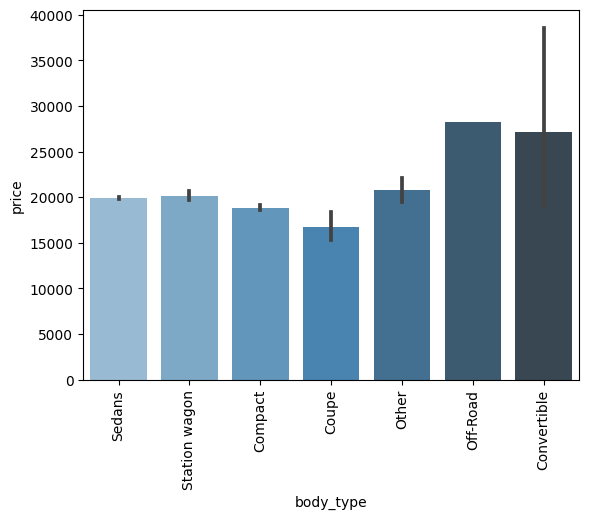

In [2322]:
# categorical features visualisation
# 'price' split in 'body_type' level
sns.barplot(x = 'body_type', y = 'price', data = df, palette = "Blues_d")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Black'),
  Text(1, 0, 'Red'),
  Text(2, 0, 'Brown'),
  Text(3, 0, 'White'),
  Text(4, 0, 'Grey'),
  Text(5, 0, 'Blue'),
  Text(6, 0, 'Silver'),
  Text(7, 0, 'Beige'),
  Text(8, 0, 'Violet'),
  Text(9, 0, 'Yellow'),
  Text(10, 0, 'Green'),
  Text(11, 0, 'Bronze'),
  Text(12, 0, 'Orange')])

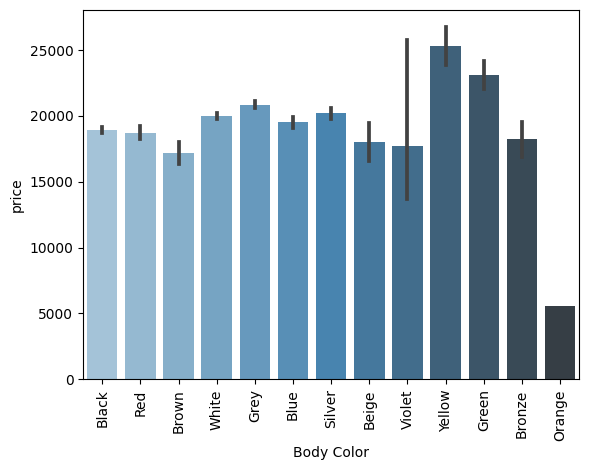

In [2323]:
# categorical features visualisation
# 'price' split in 'Body Color' level
sns.barplot(x = 'Body Color', y = 'price', data = df, palette = "Blues_d")
plt.xticks(rotation=90)

<Axes: xlabel='Gearing Type', ylabel='price'>

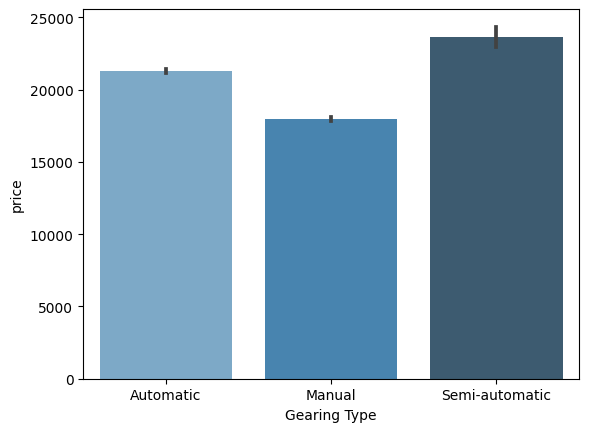

In [2324]:
# categorical features visualisation
# 'price' split in 'Gearing Type' level
sns.barplot(x = 'Gearing Type', y = 'price', data = df, palette = "Blues_d")

## Part 3: Data Wrangling and Transformation.

* ### One-Hot Encoding

In [2325]:
df['Body Color'].unique()

array(['Black', 'Red', 'Brown', 'White', 'Grey', 'Blue', 'Silver',
       'Beige', 'Violet', 'Yellow', 'Green', 'Bronze', 'Orange'],
      dtype=object)

In [2326]:
df['Body Color'].nunique()

13

In [2327]:
# One-Hot Encoding DF dataset

# first, we simply apply get_dummies to the "Body Color" column to see the details of the get_dummies

pd.get_dummies(df['Body Color'], dtype='int64', prefix = 'BC')

,BC_Beige,BC_Black,BC_Blue,BC_Bronze,BC_Brown,BC_Green,BC_Grey,BC_Orange,BC_Red,BC_Silver,BC_Violet,BC_White,BC_Yellow
ID,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,0,0,0,0,0,0,0,0,0,0,1,0
4796,0,0,0,0,0,0,0,0,0,0,0,1,0
4797,0,0,0,0,0,0,0,0,0,1,0,0,0


In [2328]:
#df_colors = pd.get_dummies(df['Body Color'], dtype='int64', prefix = 'BC')

In [2329]:
#df.head()

In [2330]:
#df_colors.head()

In [2331]:
# Now we'll combine them into data frames. 
# And we remove the "Body Color" column, we don't need it anymore, because it's not numeric.

#df = (df.drop(['Body Color'], axis = 1)).join(df_colors)    # or ..df.drop(columns=['Body Color'])...
df.drop(['Body Color'], axis = 1).join(df_colors)

,make_model,body_type,km,hp,Gearing Type,Extras,price,BC_Beige,BC_Black,BC_Blue,BC_Bronze,BC_Brown,BC_Green,BC_Grey,BC_Orange,BC_Red,BC_Silver,BC_Violet,BC_White,BC_Yellow
ID,,,,,,,,,,,,,,,,,,,,
0,Audi A1,Sedans,56013,85,Automatic,"Alloy wheels,Catalytic Converter,Voice Control",15770,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Audi A1,Sedans,80000,85,Automatic,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Audi A1,Sedans,83450,85,Automatic,"Alloy wheels,Voice Control",14640,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Audi A1,Sedans,73000,85,Automatic,"Alloy wheels,Sport seats,Voice Control",14500,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Audi A1,Sedans,16200,85,Automatic,"Alloy wheels,Sport package,Sport suspension,Vo...",16790,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,Audi A3,Sedans,54,85,Manual,"Alloy wheels,Sport seats,Sport suspension,Voic...",25000,0,0,0,0,0,0,0,0,0,0,0,1,0
4796,Audi A3,Sedans,50,85,Manual,Alloy wheels,24980,0,0,0,0,0,0,0,0,0,0,0,1,0
4797,Audi A3,Station wagon,6666,85,Manual,"Alloy wheels,Roof rack",24980,0,0,0,0,0,0,0,0,0,1,0,0,0


In [2332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   make_model    4800 non-null   object
 1   body_type     4800 non-null   object
 2   Body Color    4800 non-null   object
 3   km            4800 non-null   int64 
 4   hp            4800 non-null   int64 
 5   Gearing Type  4800 non-null   object
 6   Extras        4800 non-null   object
 7   price         4800 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 466.5+ KB


In [2333]:
# We can apply get_dummies directly to the data frame rather than applying it individually. 
# It will automatically add the column name as a prefix for each dummy variable.

pd.get_dummies(df, dtype='int64')


,km,hp,price,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,...,"Extras_Sport seats,Sport suspension,Voice Control","Extras_Sport seats,Sport suspension,Voice Control,Winter tyres","Extras_Sport seats,Voice Control",Extras_Sport suspension,"Extras_Sport suspension,Trailer hitch,Voice Control",Extras_Touch screen,"Extras_Touch screen,Voice Control",Extras_Trailer hitch,Extras_Voice Control,Extras_Winter tyres
ID,,,,,,,,,,,,,,,,,,,,,
0,56013,85,15770,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80000,85,14500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,83450,85,14640,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,73000,85,14500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16200,85,16790,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,54,85,25000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4796,50,85,24980,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4797,6666,85,24980,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2334]:
# but this will result in 355 columns
# so we consider this column separately:

pd.get_dummies(df, columns = ['make_model', 'body_type', 'Body Color', 'Gearing Type'], dtype='int64')

,km,hp,Extras,price,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,body_type_Compact,body_type_Convertible,body_type_Coupe,...,Body Color_Grey,Body Color_Orange,Body Color_Red,Body Color_Silver,Body Color_Violet,Body Color_White,Body Color_Yellow,Gearing Type_Automatic,Gearing Type_Manual,Gearing Type_Semi-automatic
ID,,,,,,,,,,,,,,,,,,,,,
0,56013,85,"Alloy wheels,Catalytic Converter,Voice Control",15770,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,80000,85,"Alloy wheels,Sport seats,Sport suspension,Voic...",14500,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,83450,85,"Alloy wheels,Voice Control",14640,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,73000,85,"Alloy wheels,Sport seats,Voice Control",14500,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,16200,85,"Alloy wheels,Sport package,Sport suspension,Vo...",16790,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,54,85,"Alloy wheels,Sport seats,Sport suspension,Voic...",25000,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4796,50,85,Alloy wheels,24980,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4797,6666,85,"Alloy wheels,Roof rack",24980,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


* #### str.get_dummies

The str.get_dummies method is a version of get_dummies that can be applied to the series. This is the version with string handling. The str.get_dummies () method separates each string in a given series with a separator. There is only one separator parameter.

In this data frame, there are some functions for the cars in the "Extras" column. For example; alloy wheels, sports seats, voice control, etc. These features are important in terms of price. Check below, there are 325 unique values. However, there are 16 additional features. The cars have a different number of optional features.

In [2335]:
df['Extras'].unique()

array(['Alloy wheels,Catalytic Converter,Voice Control',
       'Alloy wheels,Sport seats,Sport suspension,Voice Control',
       'Alloy wheels,Voice Control',
       'Alloy wheels,Sport seats,Voice Control',
       'Alloy wheels,Sport package,Sport suspension,Voice Control',
       'Alloy wheels,Sport package,Sport seats,Sport suspension',
       'Alloy wheels', 'Alloy wheels,Shift paddles',
       'Alloy wheels,Catalytic Converter,Sport package,Sport seats,Sport suspension,Voice Control',
       'Alloy wheels,Sport seats,Sport suspension',
       'Alloy wheels,Sport package,Sport seats',
       'Alloy wheels,Sport package',
       'Alloy wheels,Catalytic Converter,Shift paddles,Voice Control',
       'Alloy wheels,Shift paddles,Sport package,Voice Control',
       'Alloy wheels,Catalytic Converter,Sport seats,Voice Control,Winter tyres',
       'Alloy wheels,Winter tyres', 'Alloy wheels,Catalytic Converter',
       'Catalytic Converter', 'Alloy wheels,Sport suspension',
       'Catal

In [2336]:
df['Extras'].nunique()

325

In [2337]:
# If we apply get_dummies directly, it will add another 325 columns. So, we should use str.get_dummies. 
# We use comma (,) as a separator because values in data are separated by commas (,).

df['Extras'].str.get_dummies(',')


,Alloy wheels,Cab or rented Car,Catalytic Converter,Handicapped enabled,Right hand drive,Roof rack,Shift paddles,Ski bag,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
ID,,,,,,,,,,,,,,,,
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
4796,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4797,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


*As we can see, there are 16 additional features. Check the first line. It has alloy wheels, a catalytic converter, and a sound control; these are 1, the rest 0.*

In [2338]:
# Now let's get the latest version of the data frame by combining them:

df = pd.get_dummies(df, columns = ['make_model', 'body_type', 'Body Color', 'Gearing Type'], dtype='int64')

In [2339]:
df_extra = df['Extras'].str.get_dummies(',')

In [2340]:
df_dummy = (df.drop(['Extras'], axis = 1)).join(df_extra)

In [2341]:
df_dummy.shape

(4800, 45)

In [2342]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4799
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   km                           4800 non-null   int64
 1   hp                           4800 non-null   int64
 2   price                        4800 non-null   int64
 3   make_model_Audi A1           4800 non-null   int64
 4   make_model_Audi A2           4800 non-null   int64
 5   make_model_Audi A3           4800 non-null   int64
 6   body_type_Compact            4800 non-null   int64
 7   body_type_Convertible        4800 non-null   int64
 8   body_type_Coupe              4800 non-null   int64
 9   body_type_Off-Road           4800 non-null   int64
 10  body_type_Other              4800 non-null   int64
 11  body_type_Sedans             4800 non-null   int64
 12  body_type_Station wagon      4800 non-null   int64
 13  Body Color_Beige             4800 non-null   int64
 1

***All columns are numeric. Our data is now ready for the model***

* ### Creating datasets for ML part

* #### 'Train\Test' split

In [2343]:
# since we have only one dataset, spli it in X_train=60%, test_cmn=40%, test_cmn => validate/Test = 50/50%

from sklearn.model_selection import train_test_split

X_train, X_test_cmn, y_train, y_test_cmn = train_test_split(df_dummy, df_dummy['price'], test_size=0.4, random_state=42)

In [2344]:
# Drop target variable 
X_train = X_train.drop(columns=['price'])
X_test_cmn = X_test_cmn.drop(columns=['price'])

In [2345]:
# since we have only one dataset, spli it in (train + validate)=80%, test=20%, train/validate = 70/30%%

# NB!!! For train/val/test splitting, we need to have stratified sampling, which is not available with Numpy split(); 
# so we have to implement stratification ourself. The sci-kit's train_test_split() does that
# train, validate, test = np.split(df.sample(frac=1, random_state=4), 
#                       [int(.56*len(df)), int(.8*len(df))])

# split main dataset into Train and Test
#train, test = np.split(df_dummy.sample(frac=1, random_state=42), [int(.8*len(df_dummy))])

# identify target
#target = train['price']

In [2346]:
X_train.shape, y_train.shape

((2880, 44), (2880,))

In [2347]:
X_test_cmn.shape, y_test_cmn.shape

((1920, 44), (1920,))

In [2348]:
# set 'X' for features of scaled Test dataset 'test_cmn'
X = X_test_cmn

In [2349]:
# set 'y' for the target 'price'
#y = target

# Drop target variable 
#train = train.drop(columns=['price'])

# set 'X' for features of scaled Train dataset 'train'
#X = train


* ### 'train\test (validation)' split

In [2350]:
# split X_test_cmn dataset into 'validation' and 'test'

# from sklearn.model_selection import train_test_split

X_test, X_Test, y_test, y_Test = train_test_split(X, y_test_cmn, test_size=0.5, random_state=42)

# set 'y' for the target 'price'
y = y_test

In [2351]:
y_test

ID
3804    23400
415     13900
2432    14999
4080    21388
3065    21900
        ...  
156     17500
1097    15680
378     15889
3554    18799
1242    22000
Name: price, Length: 960, dtype: int64

In [2352]:
X_train.shape

(2880, 44)

In [2353]:
X_test.shape, X_Test.shape, y_test.shape

((960, 44), (960, 44), (960,))

In [2354]:
X_train.head()

,km,hp,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,...,Shift paddles,Ski bag,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
ID,,,,,,,,,,,,,,,,,,,,,
2859,63000,85,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4760,20,85,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,46000,85,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4790,6000,85,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
2119,5700,85,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [2355]:
X_test.head()

,km,hp,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Other,...,Shift paddles,Ski bag,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
ID,,,,,,,,,,,,,,,,,,,,,
3804,10,85,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,20000,85,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2432,148818,85,0,0,1,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
4080,10,85,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3065,38000,85,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Part 4: Machine Learning.

* ### Build, train, evaluate and visualise models

* #### Linear Regression

In [2356]:
# Linear Regression model
LR = LinearRegression()

# Model Training
LR.fit(X_train, y_train)

# Model Prediction
LR_pred = LR.predict(X_test)
LR_pred

array([24342.56695068, 17095.94446954, 13166.67002288, 21606.14065426,
       21172.13091025, 17817.35423914, 21243.52932569, 16943.848461  ,
       13411.59392786, 14842.55210544, 18585.88778226, 20208.22290939,
       19786.84625298, 24699.5765701 , 10878.81114566, 22282.80173286,
       15009.0072813 , 19017.44528265, 18576.65715259, 19131.31220838,
       21993.62485195, 19137.30049771, 22116.45960785, 18406.91167777,
       15834.21312113, 19836.43212043, 16745.00223663, 18269.19549994,
       21439.30287754, 11190.83994569, 24093.12657505, 20202.56156742,
       16692.68951529, 22051.43555957, 20613.75531036, 19013.14486316,
       20967.03873194, 23371.60011108, 14648.12965003, 17494.71310008,
       12932.9372174 , 23078.46998082, 24091.94088117, 19013.9218506 ,
       15098.85656894, 22209.14688328, 22366.32948156, 23510.66150859,
       15526.41758208, 22385.89215695, 17784.92835788, 21355.87106239,
       24681.0562735 , 14720.59889246, 14842.34894279, 19568.3031529 ,
      

In [2357]:
# Model R2 score
LRscore = LR.score(X_test, y_test)
LRscore

0.6154818388984659

In [2358]:
y_test

ID
3804    23400
415     13900
2432    14999
4080    21388
3065    21900
        ...  
156     17500
1097    15680
378     15889
3554    18799
1242    22000
Name: price, Length: 960, dtype: int64

In [2359]:
#nan_columns = [i for i in X_test.columns if X_test[i].any() < 0]

#print("There are " + str(len(nan_columns)) +" columns ")
#nan_columns
#np.any(y_test < 0)
#np.any(LinearRegression().fit(X_train, y_train).predict(X_test) < 0)

In [2360]:
#from sklearn.metrics import mean_squared_log_error as msle

#msle(y_test, np.abs(LR_pred), squared=False)

LR_pred = np.abs(LR_pred)

In [2361]:
# Model Metrics
LRMetrics = pd.DataFrame({'Model': 'Linear Regression',
                          'r2score':r2_score(y_test,LR_pred),
                          'MAE': metrics.mean_absolute_error (y_test,LR_pred),
                          'MSE': metrics.mean_squared_error(y_test,LR_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,LR_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,LR_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,LR_pred))             
                          },index=[1])

LRMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.618305,1956.103196,7.940918e+06,2817.963427,0.027159,0.164801


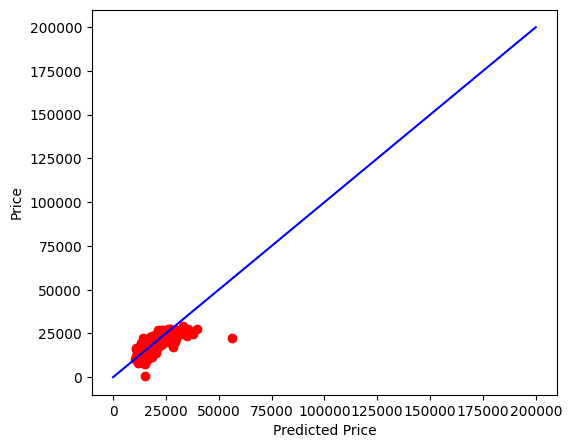

In [2362]:
# visualisation of Train dataset predictions

# Plot outputs
plt.figure(figsize=(6,5))
pl.plot(y_test, LR_pred,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Price')
pl.ylabel('Price')
pl.show()

In [2363]:
X_Test.shape

(960, 44)

In [2364]:
y.shape

(960,)

In [2365]:
# Test final predictions
LR_pred1 = LR.predict(X_Test)
LR_pred1

array([19006.15197622, 19289.62307409, 14732.04724496, 18991.94785731,
       18322.34994563, 12418.89054931, 18649.1423568 , 19554.89157168,
       22031.05242823, 18293.3437012 , 16636.21989189, 20191.27951432,
       24597.37120917, 21171.63359789, 24889.66816256, 22509.83906124,
       19844.42584735, 13233.21262243, 21628.84535815, 19879.46275806,
       20452.19549873, 21033.8698967 , 15736.21645418, 22902.74784328,
       17937.87154005, 17291.45464247, 19595.93542707, 15737.69236218,
       19748.18929202, 19871.2521539 , 19717.87705094, 15867.26759237,
       25000.9503382 , 24400.60641315, 20284.25248978, 24235.54125916,
       18064.11996318, 18153.54223003, 21334.80095974, 12506.37130525,
       15951.87961475, 13044.1766799 , 17509.2256132 , 18758.19683408,
       17167.01755691, 13524.77746741, 14237.84094084, 20091.35987805,
       17550.96590099, 17440.07867516, 24726.41701308, 20806.4251768 ,
       13065.01835512, 17433.21979761, 18876.26547467, 21617.66820782,
      

In [2366]:
# Model Metrics
LRMetrics1 = pd.DataFrame({'Model': 'Linear Regression',
                           'r2score':r2_score(y,LR_pred1),
                           'MAE': metrics.mean_absolute_error (y,LR_pred1),
                           'MSE': metrics.mean_squared_error(y,LR_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,LR_pred1)),
                           'MSLE': metrics.mean_squared_log_error(y,LR_pred1),
                           'RMSLE':np.sqrt(metrics.mean_squared_log_error(y,LR_pred1))             
                           },index=[1])

LRMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,-0.597464,4514.130104,3.323421e+07,5764.912253,0.090534,0.300888


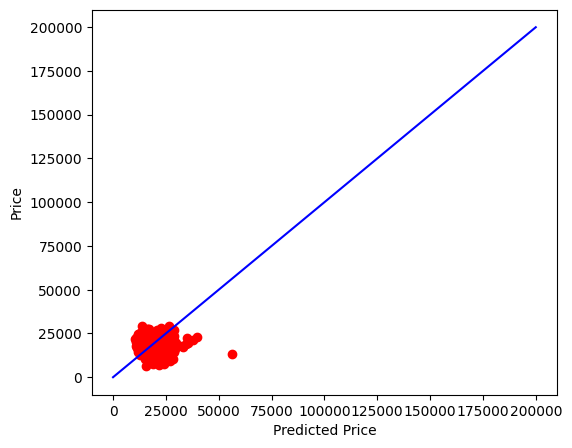

In [2367]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(6,5))
pl.plot(y, LR_pred1,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Price')
pl.ylabel('Price')
pl.show()

In [2368]:
# comparison between Actual 'price' from Train dataset abd Predicted 'price' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Price":y,"LR Predicted Price":LR_pred1 })
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Price,LR Predicted Price
ID,,
3804,23400,19006.151976
415,13900,19289.623074
2432,14999,14732.047245
4080,21388,18991.947857
3065,21900,18322.349946
721,14380,12418.890549
3728,20300,18649.142357
1237,15970,19554.891572
2721,13500,22031.052428


* #### Gradient Boosting Regressor

In [2369]:
# Gradient Boosting Regressor model
GB=GradientBoostingRegressor(random_state=0)

# Model Training
GB.fit(X_train,y_train)

# Model Prediction
GB_pred = GB.predict(X_test)

# Model R2 score
GBscore = GB.score(X_test, y_test)

In [2370]:
# Model Metrics
GBMetrics = pd.DataFrame({'Model': 'Gradient Boosting Regressor',
                          'r2score':r2_score(y_test,GB_pred),
                          'MAE': metrics.mean_absolute_error (y_test,GB_pred),
                          'MSE': metrics.mean_squared_error(y_test,GB_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,GB_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,GB_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,GB_pred))             
                          },index=[2])

GBMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
2,Gradient Boosting Regressor,0.754505,1451.234951,5.107360e+06,2259.947004,0.010413,0.102046


In [2371]:
# Test final predictions
GB_pred1 = GB.predict(X_Test)

In [2372]:
# Model Metrics
GBMetrics1 = pd.DataFrame({'Model': 'GradientBoostingRegressor',
                           'r2score':r2_score(y,GB_pred1),
                           'MAE': metrics.mean_absolute_error (y,GB_pred1),
                           'MSE': metrics.mean_squared_error(y,GB_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,GB_pred1)),
                           'MSLE': metrics.mean_squared_log_error(y,GB_pred1),
                           'RMSLE':np.sqrt(metrics.mean_squared_log_error(y,GB_pred1))             
                          },index=[1])

GBMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,GradientBoostingRegressor,-0.660574,4620.226018,3.454717e+07,5877.684434,0.086826,0.294663


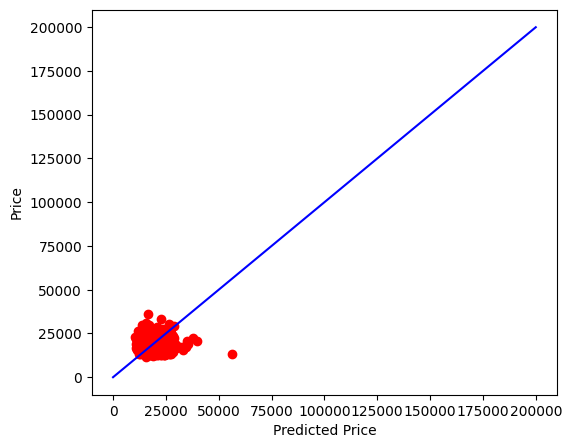

In [2373]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(6,5))
pl.plot(y, GB_pred1,'ro')
pl.plot([0,200000],[0,200000], 'b-')
pl.xlabel('Predicted Price')
pl.ylabel('Price')
pl.show()

### Model comparison

In [2374]:
# score comparison of models
frames = [LRMetrics1,GBMetrics1]
TrainingResult = pd.concat(frames)
TrainingResult

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,-0.597464,4514.130104,3.323421e+07,5764.912253,0.090534,0.300888
1,GradientBoostingRegressor,-0.660574,4620.226018,3.454717e+07,5877.684434,0.086826,0.294663


In [2375]:
# comparison between Actual 'Price' from Train dataset abd Predicted 'Price' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Price":y,"LR Predicted Price":LR_pred1, "GB Predicted Price":GB_pred1})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Price,LR Predicted Price,GB Predicted Price
ID,,,
3804,23400,19006.151976,20952.409784
415,13900,19289.623074,17259.002968
2432,14999,14732.047245,13487.963679
4080,21388,18991.947857,17757.677506
3065,21900,18322.349946,18704.432006
721,14380,12418.890549,15452.051438
3728,20300,18649.142357,21092.933012
1237,15970,19554.891572,20529.501867
2721,13500,22031.052428,20560.788797


**Result**: The "best" (slightly better model is **Gradient Boosting Regressor** with **R2 score = 0.754505**.

##  Conclusion.

In [2376]:
# submission of .csv file with final predictions
sub = pd.DataFrame()
sub['ID'] = X_Test.index
sub['Price'] = GB_pred1
sub.to_csv('CarPricePredictions.csv', index=False)